# Predicting Heart Disease using Machine Learning

# 🧠 **Heart Disease Prediction using Machine Learning**

## 📌 **1. The 6-Step Machine Learning Framework**

### 📊 **1.1 Problem Definition**

In this project, we are tackling a **binary classification** problem.

> **Objective:** Given clinical parameters about a patient, can we predict whether or not they have heart disease?

✅ **Goal:** Build a machine learning model to accurately classify whether a patient has heart disease based on their medical attributes.

### 📊 **1.2 What Data Are We Using?**

To solve this problem, we need **relevant data** describing the medical characteristics of patients.

- **Source:** The dataset originates from the **Cleveland database** of the **UCI Machine Learning Repository**.
- **Formatted Dataset:** For ease of use, we are using a preprocessed version from **Kaggle**.

**Dataset Details:**

- **Original Database:** Contains **76 attributes**.
- **Current Usage:** We will only use **14 attributes** (features) for prediction.

### 🔍 **Key Definitions:**

- **Attributes/Features:** Variables used to predict the target (also called **independent variables**).
- **Target Variable:** The outcome we want to predict (**dependent variable**).

In our case:

- **Independent Variables:** Patient's **medical attributes** (e.g., age, cholesterol level, etc.).
- **Dependent Variable:** Whether or not the patient has **heart disease** (binary outcome: 1 = has heart disease, 0 = no heart disease).

📝 **Note:** We use the **independent variables** to predict the **dependent variable**.


## 🗂️ Heart Disease Dataset - Data Dictionary

| **Column**    | **Description**                                                                                              |
|---------------|--------------------------------------------------------------------------------------------------------------|
| `age`         | Age in years                                                                                                 |
| `sex`         | Sex (1 = male; 0 = female)                                                                                   |
| `cp`          | Chest pain type:                                                                                             |
|               | - 0: Typical angina (chest pain related to decreased blood supply to the heart)                              |
|               | - 1: Atypical angina (chest pain not related to the heart)                                                   |
|               | - 2: Non-anginal pain (e.g., esophageal spasms, non-heart related)                                           |
|               | - 3: Asymptomatic (no chest pain symptoms but may still have heart disease)                                  |
| `trestbps`    | Resting blood pressure (in mm Hg on admission to hospital). Values above 130-140 are typically concerning.   |
| `chol`        | Serum cholesterol in mg/dl (LDL + HDL + 0.2 * triglycerides). Values above 200 are concerning.              |
| `fbs`         | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false). Values '>126' mg/dl may signal diabetes.             |
| `restecg`     | Resting electrocardiographic results:                                                                        |
|               | - 0: Normal (Nothing to note)                                                                               |
|               | - 1: ST-T wave abnormality (mild to severe problems, signals non-normal heart beat)                          |
|               | - 2: Left ventricular hypertrophy (enlarged heart's main pumping chamber)                                    |
| `thalach`     | Maximum heart rate achieved                                                                                  |
| `exang`       | Exercise-induced angina (1 = yes; 0 = no)                                                                    |
| `oldpeak`     | ST depression induced by exercise relative to rest. Measures heart stress during exercise.                   |
| `slope`       | Slope of the peak exercise ST segment:                                                                       |
|               | - 0: Upsloping (better heart rate response to exercise, uncommon)                                            |
|               | - 1: Flat-sloping (minimal change, typical healthy heart)                                                   |
|               | - 2: Downsloping (signs of an unhealthy heart)                                                              |
| `ca`          | Number of major vessels (0-3) colored by fluoroscopy. Higher values indicate better blood flow visibility.   |
| `thal`        | Thalium stress test result:                                                                                  |
|               | - 1, 3: Normal                                                                                              |
|               | - 6: Fixed defect (past defect, now stable)                                                                 |
|               | - 7: Reversible defect (blood flow issues during exercise)                                                   |
| `target`      | Diagnosis of heart disease (1 = disease present, 0 = no disease). This is the predicted attribute.           |



## Preparing the Tools
we're going to use pandas, matplotlib and Numpy for data analysis and manipulation

In [5]:

# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve


Load Data


In [7]:
df = pd.read_csv(r"C:\Users\shubh\Predicting Heart Disease using Machine Learning\Data\6.1 heart-disease.csv")

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.shape

(303, 14)

In [10]:
## data exploration 
# lets find how many ecah of class there
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

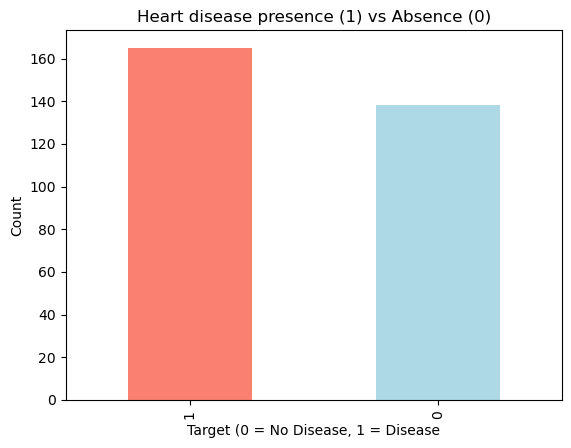

In [11]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

plt.title('Heart disease presence (1) vs Absence (0)')
plt.xlabel('Target (0 = No Disease, 1 = Disease')
plt.ylabel('Count')
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
# are there any missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
# Heart - disease according to the sex
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [16]:
# compare traget column to the sex column 
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


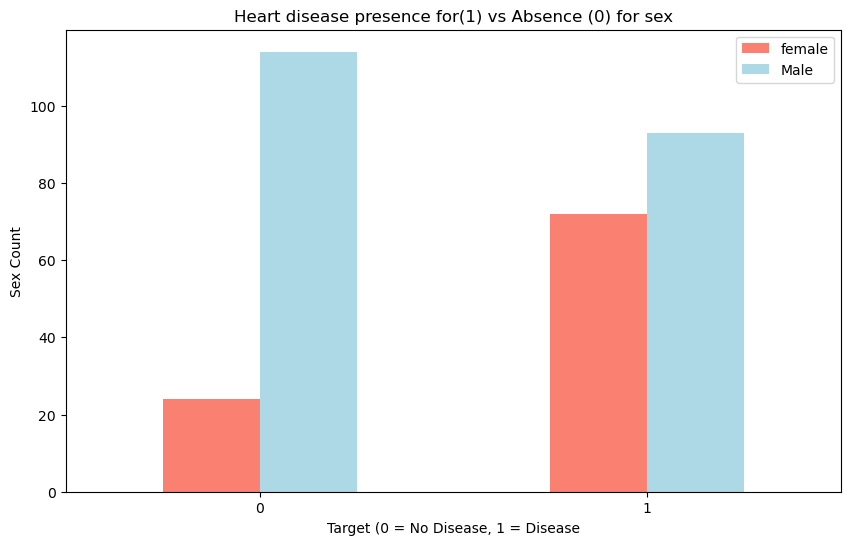

In [17]:
# create plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon','lightblue'])

plt.title('Heart disease presence for(1) vs Absence (0) for sex')
plt.xlabel('Target (0 = No Disease, 1 = Disease')
plt.ylabel('Sex Count')
plt.legend(['female','Male'])
plt.xticks(rotation=0)
plt.show()

In [23]:
df['thalach'].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

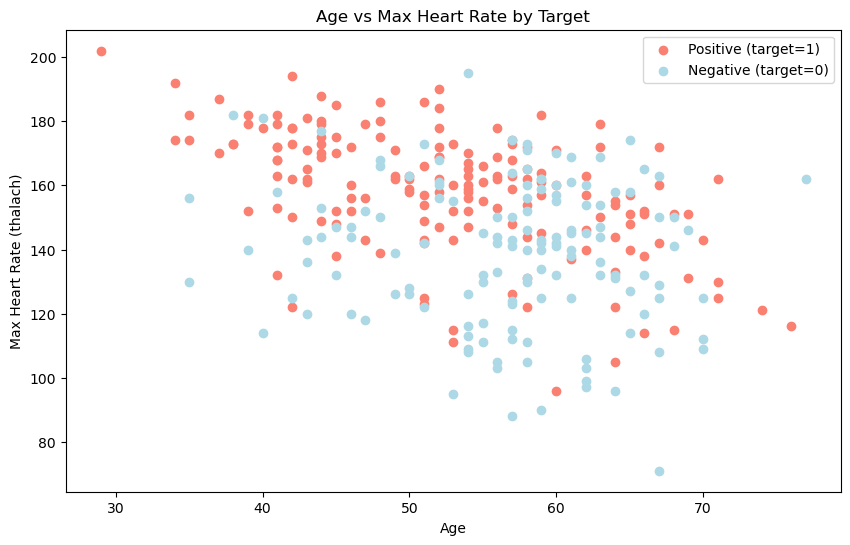

In [32]:

plt.figure(figsize=(10, 6))

# Scatter with positive examples
_ = plt.scatter(df.age[df.target == 1], 
                df.thalach[df.target == 1], 
                c='salmon', 
                label='Positive (target=1)')

# Scatter with negative examples
_ = plt.scatter(df.age[df.target == 0], 
                df.thalach[df.target == 0], 
                c='lightblue', 
                label='Negative (target=0)')

# Adding labels and legend
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalach)')
plt.legend()
plt.title('Age vs Max Heart Rate by Target')

# Display the plot
plt.show()


In [34]:
# lest cheked distrubution of the age column with a histrogram
df.age.plot.hist

plt.show()

In [36]:
# heart disease frequency per chest Pain type
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


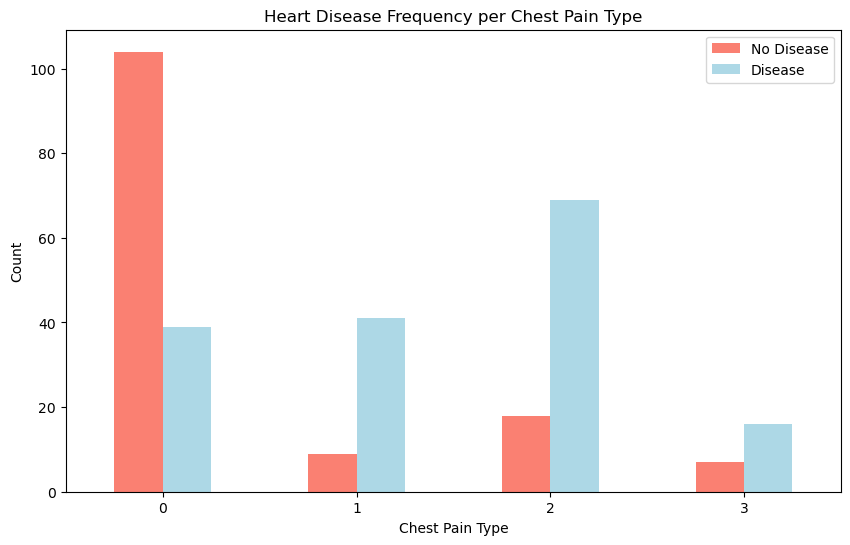

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab and plot it
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['salmon', 'lightblue'])

# Add labels and title
plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])

# Improve x-axis readability
plt.xticks(rotation=0)

# Display the plot
plt.show()


In [39]:
# lets chake correlation of each variable
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


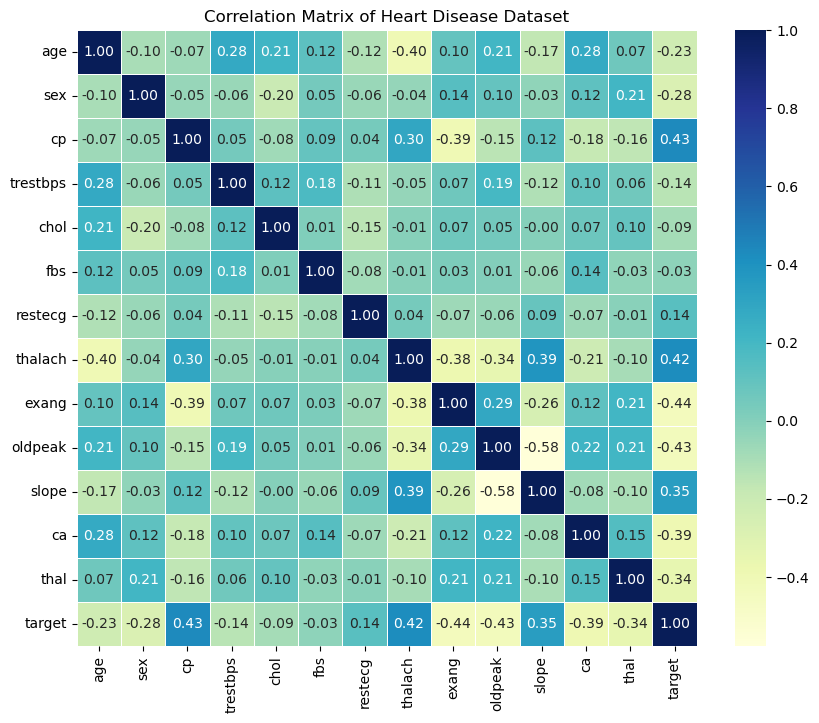

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df.corr()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))  # Adjusted size for better visualization

# Create a heatmap
sns.heatmap(corr_matrix,
            annot=True,         # Display correlation values
            linewidths=0.5,     # Add lines between cells
            fmt='.2f',          # Format to 2 decimal places
            cmap='YlGnBu',      # Fixed typo: Use correct colormap
            cbar=True,          # Show color bar
            ax=ax)              # Attach to the defined axis

# Add a title
plt.title('Correlation Matrix of Heart Disease Dataset')

# Display the plot
plt.show()



# Modeling

In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
X = df.drop("target",axis=1)
y = df['target']

In [44]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [45]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [46]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [47]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [48]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [49]:
y_train , len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

# We used followings model
1. Logistics Regression
2. K-Nearest Niegbhour Classifier
3. Random Forest Classifier

In [51]:
models = {
    'Logistic Regression': LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)

    model_scores = {}

    # Iterate through each model in the dictionary
    for name, model in models.items():  # Fixed typo: changed item() to items()
        model.fit(X_train, y_train)  # Fit the model on training data

        # Store the model's accuracy score on the test data
        model_scores[name] = model.score(X_test, y_test)  # Added X_test and y_test arguments

    return model_scores


In [52]:
models_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test= X_test,
                             y_train=y_train,
                             y_test=y_test)
models_scores

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

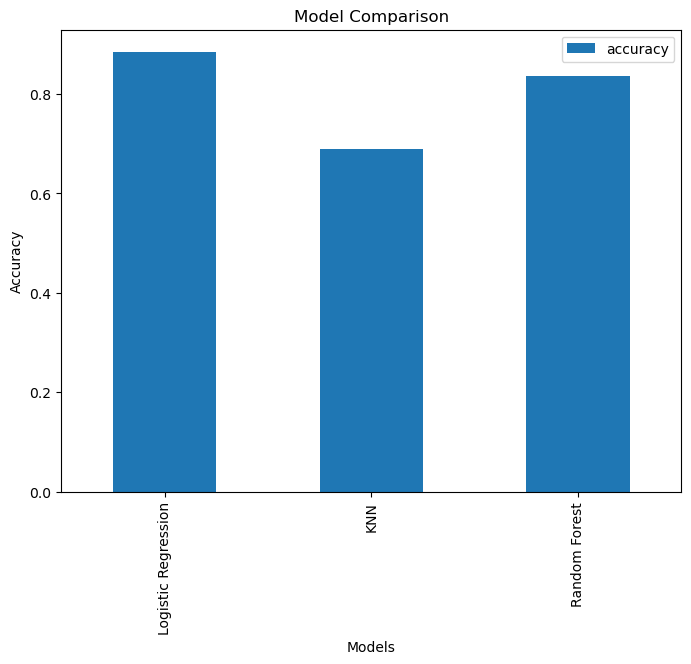

In [65]:
models_compare = pd.DataFrame(models_scores, index=['accuracy'])

# Set figure size and generate a single bar chart
plt.figure(figsize=(8, 6))
models_compare.T.plot(kind='bar', ax=plt.gca())

plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.show()

In [67]:

# Define training and testing score lists
train_score = []
test_score = []

# Create a list of different values for the n_neighbors parameter
neighbors = range(1, 21)  # For example, testing from 1 to 30 neighbors

# Iterate through different n_neighbors values
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)  # Set the parameter directly
    knn.fit(X_train, y_train)  # Train the model

    # Record accuracy on training and test sets
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))


In [69]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [70]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41% (k=11)


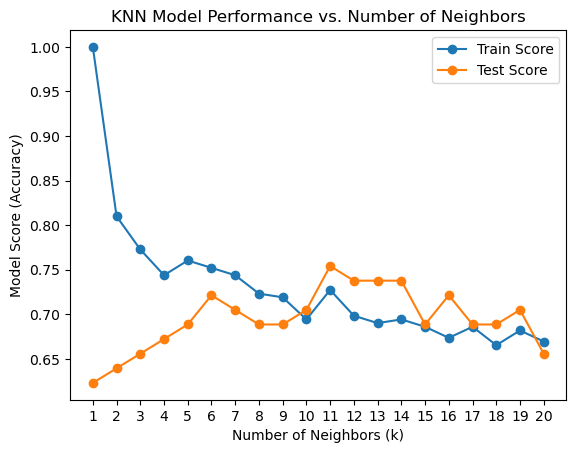

In [74]:

# Plotting the results
plt.plot(neighbors, train_score, label='Train Score', marker='o')
plt.plot(neighbors, test_score, label='Test Score', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Model Score (Accuracy)')
plt.xticks(np.arange(1, 21, 1))  # Ensure x-axis labels are integers
plt.legend()
plt.title('KNN Model Performance vs. Number of Neighbors')

# Display the best test score and corresponding k value
best_k = neighbors[np.argmax(test_score)]
best_score = max(test_score) * 100
print(f"Maximum KNN score on the test data: {best_score:.2f}% (k={best_k})")

# Show the plot
plt.show()

In [76]:
## Hyperparameter tunning with RandomizedSearchCV
                       

In [78]:
# create hyper parameter grid for logiustic regression
log_reg_grid = {
    "C" : np.logspace(-4,4,20),
    'solver': ['liblinear']
    }
rf_grid = {
    "n_estimators":np.arange(10,1000,50),
    "max_depth": [None,3 ,5,10],
    "min_samples_split" : np.arange(2,20,2),
    "min_samples_lead" : np.arange(1,202,1)
}


In [80]:
# Tune LogisticRegression
 

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [82]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [84]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [86]:
np.random.seed(42)

# Define hyperparameter grid
rf_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
rs_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=2,
                           n_jobs=-1)

# Fit the model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   verbose=2)

In [87]:
rs_rf.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 30,
 'bootstrap': False}

In [88]:
rs_rf.score(X_test, y_test)

0.8524590163934426

In [89]:
models_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [90]:
log_reg_grid = {
    "C": np.logspace(-4, 4, 30),  # Regularization strength
    "solver": ["liblinear"]       # Solver for small datasets or L1 penalty
}

# Set up the GridSearchCV
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,            # 5-fold cross-validation
                          verbose=1,       # Output progress
                          n_jobs=-1        # Use all available CPUs
                         )

# Fit the model to the training data
gs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=1)

In [91]:
# chake the best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [92]:
# evalution of model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [93]:
models_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [ ]:
# evaluting model beyond calssification


In [102]:
# make prediction with tunned model
y_preds = gs_log_reg.predict(X_test)

In [104]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

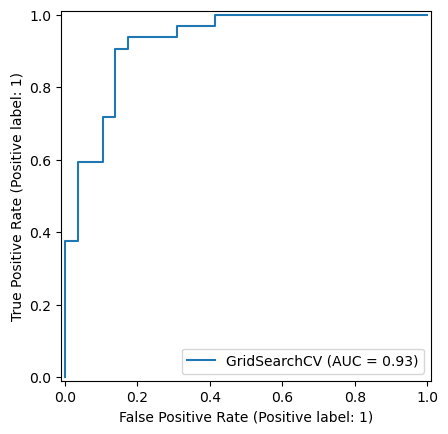

In [116]:
# importing roc curve 
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                              X=X_test,
                              y=y_test)
plt.show()

In [130]:
# confusion matrix for y_pred and y_test
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

cms  = confusion_matrix(y_test,y_preds)
cms

array([[25,  4],
       [ 3, 29]], dtype=int64)

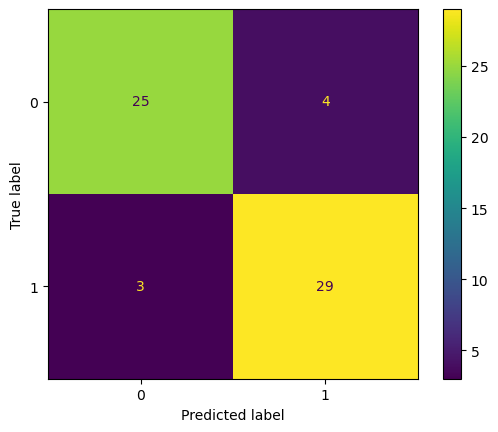

In [152]:
# lest visulalize this

dis = ConfusionMatrixDisplay(confusion_matrix=cms)
dis.plot(cmap='viridis')
plt.show()

In [156]:
# Lets print classification report 
print(classification_report(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [158]:
# calculating evalution of metrix using cross validation
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [162]:
# create new classifier with best parameters
clf  = LogisticRegression(C=0.20433597178569418,
                         solver= "liblinear")

In [168]:
# cross validation accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        scoring="accuracy")

cv_acc.mean()

0.8446994535519124

In [172]:
# cross validation precision

cv_precision = cross_val_score(clf,
                              X,
                              y,
                              scoring='precision')
cv_precision.mean()

0.8207936507936507

In [174]:
# Cross validation for recall

cv_recall = cross_val_score(clf,
                           X,
                           y,
                           scoring='recall')
cv_recall.mean()

0.9212121212121213

In [180]:
# cross valdation score f1_score
cv_f1_score = cross_val_score(
    clf,
    X,
    y,
    scoring='f1'
)

cv_f1_score = np.mean(cv_f1_score)
cv_f1_score

0.8673007976269721

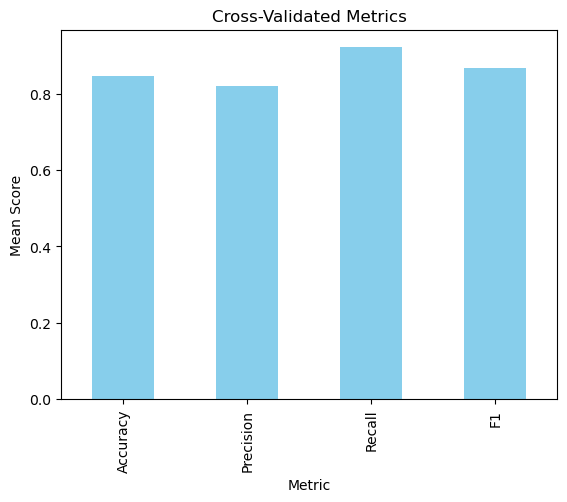

In [198]:

# Create DataFrame from cross-validation results
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1": cv_f1_score
})

# Calculate mean across cross-validation folds
cv_metrics_mean = cv_metrics.mean()

# Transpose the mean and plot
cv_metrics_mean.plot.bar(
    title="Cross-Validated Metrics",
    legend=False,
    color="skyblue"
)

plt.ylabel("Mean Score")
plt.xlabel("Metric")
plt.show()

In [ ]:
# feature important
##
## which feature is most outcome to the model

In [200]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [202]:
# fit an instance of logisticRgression

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [206]:
clf = LogisticRegression(C= 0.20433597178569418,solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [208]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067044, -0.01156993, -0.00166374,
         0.04386111,  0.31275842,  0.02459361, -0.6041308 , -0.56862808,
         0.45051629, -0.63609895, -0.67663378]])

In [218]:
# map the coef's of features to columns
features_dict = dict(zip(df.columns,list(clf.coef_[0])))
features_dict

{'age': 0.003167280425913024,
 'sex': -0.8604465017405314,
 'cp': 0.6606704375815468,
 'trestbps': -0.011569931400895204,
 'chol': -0.0016637445504085657,
 'fbs': 0.04386110683275644,
 'restecg': 0.3127584216723769,
 'thalach': 0.024593614040407018,
 'exang': -0.6041307979006147,
 'oldpeak': -0.5686280785492623,
 'slope': 0.45051628777983527,
 'ca': -0.6360989513753182,
 'thal': -0.6766337783287578}

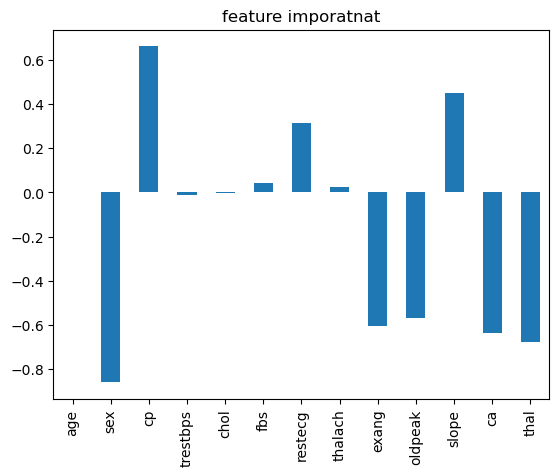

In [220]:
# visulize feature important
feature_df = pd.DataFrame(features_dict,index=[0])
feature_df.T.plot.bar(title='feature imporatnat',legend=False)
plt.show()

In [226]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [230]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
